# Use Case: Adaptation to Climate Extremes.
## User Question: How well does gridded data derived from observations represent local exposure to heatwaves? How do EOBS air temperature extremes compare to those derived from reanalysis?

### About

In this Use Case we will access the ***E-OBS daily gridded meteorological data for Europe from 1950 to present derived from in-situ observations*** (henceforth, E-OBS) data from the Climate Data Store (CDS) of the Copernicus Climate Change Service (C3S) and analyse the spatial consistency of the E-OBS air temperature climatology over a given Area of Interest (AoI).

**This Use Case aims to address the following User Questions:**

1) How consistent are the estimates of extreme heat and cold days from E-OBS, compared to those from reanalysis products?


**This notebook comprises the following steps:** 
1. Define the AoI, search and download E-OBS
2. Inspect and view data
3. Calculation of 90-Percentile for E-OBS and ERA5
4. Trend Analysis Anomalies of Minimum Temperature and Maximum Tempertaure, using Mann-kendal and Thei-Sen Slope estimations
5. Main Takeaways
6. References

**The Quality Statements of this Use Case are:**

- The study examined annual trends in heat-related indices based on daily minimum and maximum temperatures (TN and TX, respectively) across the Iberian Peninsula using E-OBS and ERA5 datasets, comparing their fitness in capturing the number of warm nights (TN90p) and hot days (TX90p), following the guidelines of the World Meteorological Organization Expert Team on Sector-specific Climate Indices (ET-SCI) changes over the complete time series length.

- E-OBS consistently demonstrates a higher amplitude of daily temperature values, reflected in higher TX and lower TN values over the full-time series. In particular, this translated into a bias of EOBS and ERA5 90th percentiles of TN and TX, which varies seasonally. Indeed, EOBS shows lower TN percentile 90th values during winter (circa 2ºC difference), and higher percentile 90th TX values during the summer (more than 2ºC).

- Nevertheless, both datasets are consistent in depicting warm nights and hot days indices, showing similar statistics and equivalent long-term linear trends. This indicates that extreme temperature indices based on absolute temperatures may be more precisely quantified using EOBS; conversely, those indices that are based on relative thresholds might showcase similar findings, offering a greater degree of confidence in the results obtained, due to the consistency between both datasets.

- In this case, warm nights are shown to be increasing by 5 days per decade (compared to the 1961-1990 reference period) while hot days have been increasing by more than 8 days per decade. Furthermore, daily anomalies of nocturnal and diurnal temperatures vary by, approximately, 0.1ºC/decade (TN90p, annual maximum) and 0.4ºC/decade (TX90p, annual maximum), respectively. These trends are consistent between EOBS and ERA5.

- Hence, this intercomparison underscores the importance of analysing the physical consistency among datasets, ensuring accurate detection of temperature extremes and informing robust climate analyses.  As observed by *Cornes et al. (2018)*, the importance of addressing uncertainties and improving data resolution to ensure comprehensive temperature assessments with high accuracy and completeness.



![alt text](Trens_TX_EOBS-1.png)

## 1. Define the AoI, search and download E-OBS
Before we begin, we must prepare our environment. This includes installing the Application Programming Interface (API) of the CDS and importing the various python libraries that we will need.

### Install CDS API
To install the CDS API, run the following command. We use an exclamation mark to pass the command to the shell (not to the Python interpreter).
If you already have the CDS API installed, you can skip or comment this step.

In [ ]:
# !pip install cdsapi

### Import all the libraries/packages

We will be working with data in NetCDF format. To best handle this data we will use libraries for working with multidimensional arrays, in particular Xarray. We will also need libraries for plotting and viewing data, in this case we will use Matplotlib and Cartopy.

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import pymannkendall as mk
from c3s_eqc_automatic_quality_control import download, utils, diagnostics, plot


plt.rcParams["figure.figsize"] = [15, 5]
plt.style.use("seaborn-v0_8-notebook")

import warnings
import os
warnings.filterwarnings("ignore")

### Data Overview

To search for data, visit the CDS website: http://cds.climate.copernicus.eu. Here you can search for 'in-situ observations' using the search bar. The data we need for this tutorial is the ***E-OBS daily gridded meteorological data for Europe from 1950 to present derived from in-situ observations***. This catalogue entry provides a daily gridded dataset of historical meteorological observations, covering Europe (land-only), from 1950 to the present. This data is derived from in-situ meteorological stations, made available through the European Climate Assessment & Dataset (ECA&D) project, as provided by National Meteorological and Hydrological Services (NMHSs) and other data-holding institutes. 

E-OBS comprises a set of spatially continuous Essential Climate Variables (ECVs) from the Surface Atmosphere, following the Global Climate Observing System (GCOS) convention, provided as the mean and spread of the spatial prediction ensemble algorithm, at <ins>regular latitude-longitude grid intervals</ins> (at a 0.1° and 0.25° spatial resolution), and covering a long time-period, from 1 January 1950 to present-day. In addition to the land surface elevation, E-OBS includes daily air temperature (mean, maximum and minimum), precipitation amount, wind speed, sea-level pressure and shortwave downwelling radiation. 

The latest E-OBS version, **E-OBSv25.0e**, was released in April 2022 and its main difference from the previous E-OBSv24.0e is the amount of input data used.

Having selected the correct dataset, we now need to specify what product type, variables, temporal and geographic coverage we are interested in. In this Use Case, the ensemble mean of air temperature (TG), daily minimum temperature TN and daily maximum temperature TX will be used, considering the last version available. These can all be selected in the “Download data” tab from the CDS. In this tab a form appears in which we will select the following parameters to download, for example:

* **Product Type:** Ensemble mean  
* **Variable:** Mean temperature, Minimum temperature, Maximum temperature  
* **Grid resolution:** 0.25  
* **Period:** Full period  
* **Version:** 25.0e  
* **Format:** Zip file (.zip)

At the end of the download form, select “**Show API request**”. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook …

Download data
… having copied the API request to a Jupyter Notebook cell, running it will retrieve and download the data you requested into your local directory. However, before you run it, the **terms and conditions** of this particular dataset need to have been accepted directly at the CDS website. The option to view and accept these conditions is given at the end of the download form, just above the “**Show API request**” option. In addition, it is also useful to define the time period and AoI parameters and edit the request accordingly, as exemplified in the cells below.

### Download and prepared E-OBS data

Download and prepare E-OBS daily minimum air temperature data (TN)

In [3]:
# Define request
request = (
    "insitu-gridded-observations-europe",
    {
        "format": "zip",
        "product_type": "ensemble_mean",
        "variable": "minimum_temperature",
        "grid_resolution": "0.25deg",
        "period": "full_period",
        "version": "25.0e",
        "area": [42.15, -9.50, 36.95, -6.19],
    },
)

# Process the request
tn_EOBS = download.download_and_transform(*request)

2024-05-31 18:01:54,430 INFO Welcome to the CDS
2024-05-31 18:01:54,432 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-europe
2024-05-31 18:01:54,708 INFO Request is queued
2024-05-31 18:01:55,773 INFO Request is running


KeyboardInterrupt: 

In [3]:
# Subset data for the year range 1950 to 2020
tn_EOBS = tn_EOBS.sel(time=slice('1950-01-01', '2020-12-31'))

# Inspect data
tn_EOBS

<xarray.Dataset>
Dimensions:    (time: 25933, latitude: 21, longitude: 13)
Coordinates:
  * longitude  (longitude) float64 -9.375 -9.125 -8.875 ... -6.875 -6.625 -6.375
  * latitude   (latitude) float64 37.12 37.38 37.62 37.88 ... 41.62 41.88 42.12
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    tn         (time, latitude, longitude) float32 dask.array<chunksize=(1, 21, 13), meta=np.ndarray>
Attributes:
    E-OBS_version:  25.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Wed Mar 30 09:17:04 2022: ncks --no-abc -d time,0,26297 /...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....

In [4]:
# Specify the old variable name
old_variable_name = 'tn'

# Specify the new variable name, long name and units
new_variable_name = 'TN EOBS'
new_long_name = 'Daily Minimum Temperature'
new_units = '°C'

# Change the variable name and long name
tn_EOBS  = tn_EOBS.rename({old_variable_name: new_variable_name})
tn_EOBS[new_variable_name].attrs['long_name'] = new_long_name
tn_EOBS[new_variable_name].attrs['units'] = new_units

tn_EOBS

<xarray.Dataset>
Dimensions:    (time: 25933, latitude: 21, longitude: 13)
Coordinates:
  * longitude  (longitude) float64 -9.375 -9.125 -8.875 ... -6.875 -6.625 -6.375
  * latitude   (latitude) float64 37.12 37.38 37.62 37.88 ... 41.62 41.88 42.12
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    TN EOBS    (time, latitude, longitude) float32 dask.array<chunksize=(1, 21, 13), meta=np.ndarray>
Attributes:
    E-OBS_version:  25.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Wed Mar 30 09:17:04 2022: ncks --no-abc -d time,0,26297 /...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....

Download and prepare E-OBS daily maximum air temperature data (TX)

In [5]:
# Define request
request = (
    "insitu-gridded-observations-europe",
    {
        "format": "zip",
        "product_type": "ensemble_mean",
        "variable": "maximum_temperature",
        "grid_resolution": "0.25deg",
        "period": "full_period",
        "version": "25.0e",
        "area": [42.15, -9.50, 36.95, -6.19],
    },
)

# Process the request
tx_EOBS = download.download_and_transform(*request)

In [6]:
# Subset data for the year range 1950 to 2020
tx_EOBS = tx_EOBS.sel(time=slice('1950-01-01', '2020-12-31'))

# Inspect data
tx_EOBS

<xarray.Dataset>
Dimensions:    (time: 25933, latitude: 21, longitude: 13)
Coordinates:
  * longitude  (longitude) float64 -9.375 -9.125 -8.875 ... -6.875 -6.625 -6.375
  * latitude   (latitude) float64 37.12 37.38 37.62 37.88 ... 41.62 41.88 42.12
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    tx         (time, latitude, longitude) float32 dask.array<chunksize=(1, 21, 13), meta=np.ndarray>
Attributes:
    E-OBS_version:  25.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Wed Mar 30 09:22:21 2022: ncks --no-abc -d time,0,26297 /...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....

In [7]:
# Specify the old variable name
old_variable_name = 'tx'

# Specify the new variable name, long name and units
new_variable_name = 'TX EOBS'
new_long_name = 'Daily Maximum Temperature'
new_units = '°C'

# Change the variable name and long name
tx_EOBS  = tx_EOBS.rename({old_variable_name: new_variable_name})
tx_EOBS[new_variable_name].attrs['long_name'] = new_long_name
tx_EOBS[new_variable_name].attrs['units'] = new_units

tx_EOBS

<xarray.Dataset>
Dimensions:    (time: 25933, latitude: 21, longitude: 13)
Coordinates:
  * longitude  (longitude) float64 -9.375 -9.125 -8.875 ... -6.875 -6.625 -6.375
  * latitude   (latitude) float64 37.12 37.38 37.62 37.88 ... 41.62 41.88 42.12
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    TX EOBS    (time, latitude, longitude) float32 dask.array<chunksize=(1, 21, 13), meta=np.ndarray>
Attributes:
    E-OBS_version:  25.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Wed Mar 30 09:22:21 2022: ncks --no-abc -d time,0,26297 /...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....

### Download ERA5 data

Download and prepare ERA5 hourly air temperature data

In [8]:
# Define time interval
start = "1950-01"
stop = "1970-12"

# Define request
collection_id = "reanalysis-era5-single-levels"
request = {
    "product_type": "ensemble_mean",
    "format": 'netcdf',
    "variable": "2m_temperature",
    "time": [f"{hour:02d}:00" for hour in range(0, 24, 3)],
    "area": [44, -10, 36, 1],

}

requests = download.update_request_date(request, start, stop)

# Process the request
ds_ERA5_0 = download.download_and_transform(collection_id, requests, chunks={"year": 1})

100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 54.30it/s]


In [9]:

# Define time interval
start = "1971-01"
stop = "1975-12"

# Define request
collection_id = "reanalysis-era5-single-levels"
request = {
    "product_type": "ensemble_mean",
    "format": 'netcdf',
    "variable": "2m_temperature",
    "time": [f"{hour:02d}:00" for hour in range(0, 24, 3)],
    "area": [44, -10, 36, 1],

}

requests = download.update_request_date(request, start, stop)

# Process the request
ds_ERA5_1 = download.download_and_transform(collection_id, requests, chunks={"year": 1})


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 59.79it/s]


In [10]:

# Define time interval
start = "1976-01"
stop = "1980-12"

# Define request
collection_id = "reanalysis-era5-single-levels"
request = {
    "product_type": "ensemble_mean",
    "format": 'netcdf',
    "variable": "2m_temperature",
    "time": [f"{hour:02d}:00" for hour in range(0, 24, 3)],
    "area": [44, -10, 36, 1],

}

requests = download.update_request_date(request, start, stop)

# Process the request
ds_ERA5_2 = download.download_and_transform(collection_id, requests, chunks={"year": 1})


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 51.63it/s]


In [11]:

# Define time interval
start = "1981-01"
stop = "1985-12"

# Define request
collection_id = "reanalysis-era5-single-levels"
request = {
    "product_type": "ensemble_mean",
    "format": 'netcdf',
    "variable": "2m_temperature",
    "time": [f"{hour:02d}:00" for hour in range(0, 24, 3)],
    "area": [44, -10, 36, 1],

}

requests = download.update_request_date(request, start, stop)

# Process the request
ds_ERA5_3 = download.download_and_transform(collection_id, requests, chunks={"year": 1})


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 53.36it/s]


In [12]:

# Define time interval
start = "1986-01"
stop = "1995-12"

# Define request
collection_id = "reanalysis-era5-single-levels"
request = {
    "product_type": "ensemble_mean",
    "format": 'netcdf',
    "variable": "2m_temperature",
    "time": [f"{hour:02d}:00" for hour in range(0, 24, 3)],
    "area": [44, -10, 36, 1],

}

requests = download.update_request_date(request, start, stop)

# Process the request
ds_ERA5_4 = download.download_and_transform(collection_id, requests, chunks={"year": 1})


100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 54.42it/s]


In [13]:

# Define time interval
start = "1996-01"
stop = "2020-12"

# Define request
collection_id = "reanalysis-era5-single-levels"
request = {
    "product_type": "ensemble_mean",
    "format": 'netcdf',
    "variable": "2m_temperature",
    "time": [f"{hour:02d}:00" for hour in range(0, 24, 3)],
    "area": [44, -10, 36, 1],

}



requests = download.update_request_date(request, start, stop)

# Process the request
ds_ERA_5 = download.download_and_transform(collection_id, requests, chunks={"year": 1})


100%|███████████████████████████████████████████| 25/25 [00:00<00:00, 54.60it/s]


In [104]:
#Merge all the ERA5 datasets downloaded (to have a complete one: from 1950-2020)

datasets = [ds_ERA5_0, ds_ERA5_1, ds_ERA5_2, ds_ERA5_3, ds_ERA5_4, ds_ERA_5]

# Optionally sort datasets by time if needed
datasets_sorted = sorted(datasets, key=lambda ds: ds['time'].min().values)

# Concatenate along the time dimension
ds_ERA5 = xr.concat(datasets_sorted, dim='time')

In [39]:
# save datasets
ds_ERA5.to_netcdf('ERA5_singlelevels_TMP2m_1950_2020.nc',format='NETCDF4')

In [107]:
# Convert Kelvin to Celsius
ds_ERA5["t2m"] = ds_ERA5["t2m"] - 273.15

Resample ERA5 hourly date to get the daily minimum and maximum air temperatures (TN and TX, respectively)

In [108]:
# Resample to daily frequency and choose the aggregation method (minimum in this case)
tn_ERA5 = ds_ERA5.resample(time='1D').min(dim='time')

# Resample to daily frequency and choose the aggregation method (maximum in this case)
tx_ERA5 = ds_ERA5.resample(time='1D').max(dim='time')

tx_ERA5

<xarray.Dataset>
Dimensions:    (time: 25933, latitude: 17, longitude: 23)
Coordinates:
  * longitude  (longitude) float32 -10.0 -9.5 -9.0 -8.5 ... -0.5 0.0 0.5 1.0
  * latitude   (latitude) float32 44.0 43.5 43.0 42.5 ... 37.5 37.0 36.5 36.0
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(365, 17, 23), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-23 13:09:15 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [109]:
# Specify the old variable name
old_variable_name = 't2m'

# Specify the new variable name, long name and units
new_variable_name = 'TN ERA5'
new_long_name = 'Daily Minimum Temperature'
new_units = '°C'

# Change the variable name and long name
tn_ERA5  = tn_ERA5.rename({old_variable_name: new_variable_name})
tn_ERA5[new_variable_name].attrs['long_name'] = new_long_name
tn_ERA5[new_variable_name].attrs['units'] = new_units

tn_ERA5

<xarray.Dataset>
Dimensions:    (time: 25933, latitude: 17, longitude: 23)
Coordinates:
  * longitude  (longitude) float32 -10.0 -9.5 -9.0 -8.5 ... -0.5 0.0 0.5 1.0
  * latitude   (latitude) float32 44.0 43.5 43.0 42.5 ... 37.5 37.0 36.5 36.0
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    TN ERA5    (time, latitude, longitude) float32 dask.array<chunksize=(365, 17, 23), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-23 13:09:15 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [110]:
# Specify the old variable name
old_variable_name = 't2m'

# Specify the new variable name, long name and units
new_variable_name = 'TX ERA5'
new_long_name = 'Daily Maximum Temperature'
new_units = '°C'


# Change the variable name and long name
tx_ERA5  = tx_ERA5.rename({old_variable_name: new_variable_name})
tx_ERA5[new_variable_name].attrs['long_name'] = new_long_name
tx_ERA5[new_variable_name].attrs['units'] = new_units

tx_ERA5

<xarray.Dataset>
Dimensions:    (time: 25933, latitude: 17, longitude: 23)
Coordinates:
  * longitude  (longitude) float32 -10.0 -9.5 -9.0 -8.5 ... -0.5 0.0 0.5 1.0
  * latitude   (latitude) float32 44.0 43.5 43.0 42.5 ... 37.5 37.0 36.5 36.0
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    TX ERA5    (time, latitude, longitude) float32 dask.array<chunksize=(365, 17, 23), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-23 13:09:15 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

## Join E-OBS with ERA5

In [111]:

# Interpolate ERA5 Minimum Temperature (tn) to match E-OBS resolution (e.g., from 0.5x0.5 to 0.25x0.25)
tn_ERA5 = tn_ERA5.interp_like(tn_EOBS)

#change chunk sizes for the data in the xarray
#tn_ERA5 = tn_ERA5.chunk({'time': 365, 'latitude': 21, 'longitude': 13})

tn_ERA5

<xarray.Dataset>
Dimensions:    (time: 25933, latitude: 21, longitude: 13)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
  * latitude   (latitude) float64 37.12 37.38 37.62 37.88 ... 41.62 41.88 42.12
  * longitude  (longitude) float64 -9.375 -9.125 -8.875 ... -6.875 -6.625 -6.375
Data variables:
    TN ERA5    (time, latitude, longitude) float32 dask.array<chunksize=(25933, 21, 13), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-23 13:09:15 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [112]:

# Interpolate ERA5 Maximum Temperature (tx) to match E-OBS resolution (e.g., from 0.5x0.5 to 0.25x0.25)
tx_ERA5 = tx_ERA5.interp_like(tx_EOBS)

#change chunk sizes for the data in the xarray
#tx_ERA5 = tx_ERA5.chunk({'time': 365, 'latitude': 21, 'longitude': 13})

tx_ERA5

<xarray.Dataset>
Dimensions:    (time: 25933, latitude: 21, longitude: 13)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
  * latitude   (latitude) float64 37.12 37.38 37.62 37.88 ... 41.62 41.88 42.12
  * longitude  (longitude) float64 -9.375 -9.125 -8.875 ... -6.875 -6.625 -6.375
Data variables:
    TX ERA5    (time, latitude, longitude) float32 dask.array<chunksize=(25933, 21, 13), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-23 13:09:15 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [113]:
# Merge the two datasets using latitude and longitude as coordinates
merged_tn = xr.merge([tn_EOBS, tn_ERA5], join='left')

#to improve computational efficiency
merged_tn['TN ERA5'] = merged_tn['TN ERA5'].chunk({'time': 365})

## 2. Inspect and view data

### Create a set of weights based on latitude values
These weights can be used to account for the varying area of grid cells in latitude-longitude grids to ensure that calculations properly account for varying areas represented by grid cells at different latitudes

In [115]:


weights = np.cos(np.deg2rad(merged_tn.latitude))
weights.name = "weights"
weights

<xarray.DataArray 'weights' (latitude: 21)>
array([0.79732065, 0.79467956, 0.79202334, 0.78935204, 0.78666571,
       0.78396441, 0.78124818, 0.77851708, 0.77577115, 0.77301045,
       0.77023504, 0.76744496, 0.76464028, 0.76182103, 0.75898728,
       0.75613908, 0.75327649, 0.75039955, 0.74750833, 0.74460287,
       0.74168324])
Coordinates:
  * latitude  (latitude) float64 37.12 37.38 37.62 37.88 ... 41.62 41.88 42.12
Attributes:
    units:          degrees_north
    long_name:      Latitude values
    axis:           Y
    standard_name:  latitude
    positive:       North
    type:           double
    valid_max:      90.0
    valid_min:      -90.0
    out_name:       latitude

The weighted method is used to create a weighted dataset. Any subsequent aggregation operations (such as mean, sum, etc.) will take these weights into account.

In [116]:
merged_tn_weighted = merged_tn.weighted(weights)
merged_tn_weighted

DatasetWeighted with weights along dimensions: latitude

In [117]:
mean_tn = merged_tn_weighted.mean(("longitude", "latitude"))

#change chunk sizes for the data in the xarray
mean_tn['TN ERA5'] = mean_tn['TN ERA5'].chunk({'time': 365})

mean_tn

<xarray.Dataset>
Dimensions:  (time: 25933)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    TN EOBS  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    TN ERA5  (time) float64 dask.array<chunksize=(365,), meta=np.ndarray>

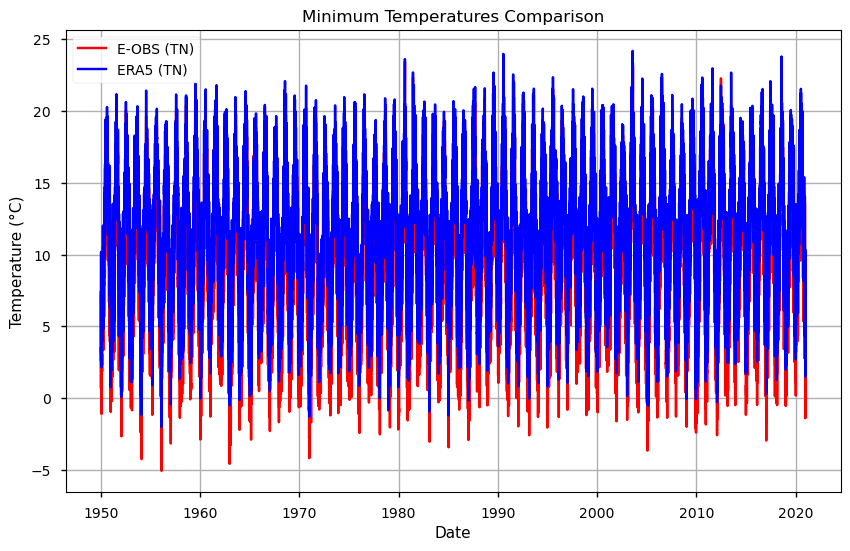

In [25]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.title('Minimum (TN) Temperatures Comparison')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Plot tg data
plt.plot(mean_tn.time, mean_tn['TN EOBS'], label='E-OBS (TN)', color='red')
plt.plot(mean_tn.time, mean_tn['TN ERA5'], label='ERA5 (TN)', color='blue')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


### Merge the two tx datasets using latitude and longitude as coordinates


In [118]:
merged_tx = xr.merge([tx_EOBS, tx_ERA5], join='left')

#change chunk sizes for the data in the xarray
merged_tx['TX ERA5'] = merged_tx['TX ERA5'].chunk({'time': 365})

weights = np.cos(np.deg2rad(merged_tx.latitude))
weights.name = "weights"

merged_tx_weighted = merged_tx.weighted(weights)

mean_tx = merged_tx_weighted.mean(("longitude", "latitude"))

mean_tx 

<xarray.Dataset>
Dimensions:  (time: 25933)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Data variables:
    TX EOBS  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    TX ERA5  (time) float64 dask.array<chunksize=(365,), meta=np.ndarray>

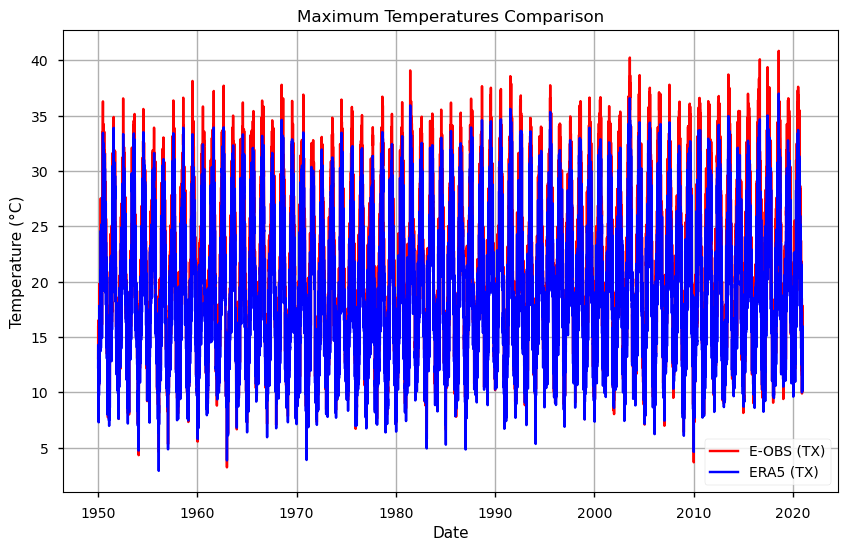

In [27]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.title('Maximum (TX) Temperatures Comparison')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Plot tg data
plt.plot(mean_tx.time, mean_tx['TX EOBS'], label='E-OBS (TX)', color='red')
plt.plot(mean_tx.time, mean_tx['TX ERA5'], label='ERA5 (TX)', color='blue')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


#### Discover the year in which the mean temperature values for the TN EOBS variable is the lowest

In [119]:

#Resample the data to yearly means
yearly_means_tn = mean_tn['TN EOBS'].resample(time='Y').mean()

#Find the year with the minimum mean value
min_year_index = yearly_means_tn.argmin().values

min_year = yearly_means_tn.time[min_year_index].dt.year.values

print(f"The year with the minimum mean value for 'TN EOBS' is: {min_year}")

The year with the minimum mean value for 'TN EOBS' is: 1956


In [120]:
min_temp_year = str(min_year)

subset_tn = mean_tn.sel(time=min_temp_year)

subset_tn

<xarray.Dataset>
Dimensions:  (time: 366)
Coordinates:
  * time     (time) datetime64[ns] 1956-01-01 1956-01-02 ... 1956-12-31
Data variables:
    TN EOBS  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    TN ERA5  (time) float64 dask.array<chunksize=(364,), meta=np.ndarray>

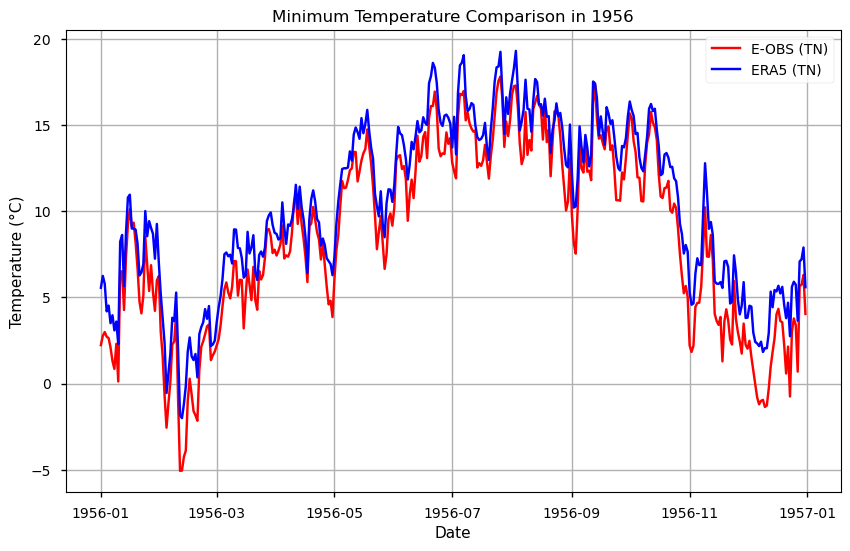

In [28]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.title(f'Minimum Temperature Comparison in {min_temp_year}')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Plot tg data
plt.plot(subset_tn.time, subset_tn['TN EOBS'], label='E-OBS (TN)', color='red')
plt.plot(subset_tn.time, subset_tn['TN ERA5'], label='ERA5 (TN)', color='blue')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


#### Discover the year in which the mean temperature values for the TX EOBS variable is the highest

In [121]:
#Resample the data to yearly means
yearly_means_tx = mean_tx['TX EOBS'].resample(time='Y').mean()

#Find the year with the minimum mean value
max_year_index = yearly_means_tx.argmax().values

max_year = yearly_means_tx.time[max_year_index].dt.year.values

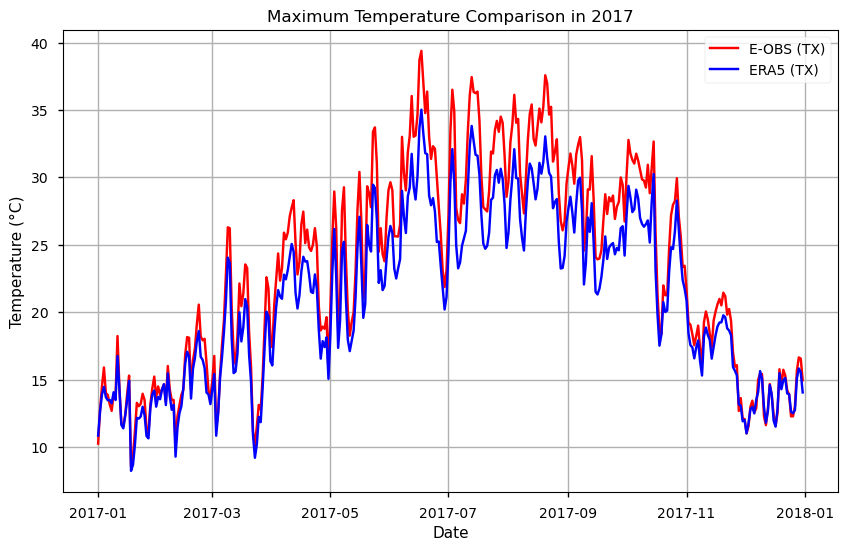

In [32]:

max_temp_year = str(max_year)

subset_tx = mean_tx.sel(time=max_temp_year)

# Plot the data
plt.figure(figsize=(10, 6))
plt.title(f'Maximum Temperature Comparison in {max_temp_year}')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Plot tg data
plt.plot(subset_tx.time, subset_tx['TX EOBS'], label='E-OBS (TX)', color='red')
plt.plot(subset_tx.time, subset_tx['TX ERA5'], label='ERA5 (TX)', color='blue')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


#### Save the data into .csv and .nc formats

In [34]:
# Save as NetCDF for inspecting spatially averaged data
mean_tn.to_netcdf('TN_EOBS_ERA5_merged_IBI.nc')
# Convert xarray dataset to pandas DataFrame
df = mean_tn.to_dataframe()
df.to_csv('TN_EOBS_ERA5_merged_weighted_mean_IBI.csv')

- calcular o percentil 90 para cada dia do ano, com base no mesmo periodo de referencia 1961-1990 (suavização a janela-15 dias) - E-OBs +ERA5

- (diferenças) Anomalia para E-OBS e ERA5



## 3. Calculation of 90-Percentile for E-OBS and ERA5


### Calculation of Percentil-90 for Minimum Temperaure - TN

A comparison between EOBS and ERA-5 it will be developed

In [122]:
start_date = '1961-01-01'
end_date = '1990-12-31'

# Extract the 'dayofyear' information
merged_tn['dayofyear'] = merged_tn['time.dayofyear']

# Subset the dataset for the specified date range
ref_clim_tn = merged_tn.sel(time=slice(start_date, end_date))

ref_clim_tn = ref_clim_tn.chunk({'time': -1})

ref_clim_tn

<xarray.Dataset>
Dimensions:    (time: 10957, latitude: 21, longitude: 13)
Coordinates:
  * longitude  (longitude) float64 -9.375 -9.125 -8.875 ... -6.875 -6.625 -6.375
  * latitude   (latitude) float64 37.12 37.38 37.62 37.88 ... 41.62 41.88 42.12
  * time       (time) datetime64[ns] 1961-01-01 1961-01-02 ... 1990-12-31
Data variables:
    TN EOBS    (time, latitude, longitude) float32 dask.array<chunksize=(10957, 21, 13), meta=np.ndarray>
    TN ERA5    (time, latitude, longitude) float32 dask.array<chunksize=(10957, 21, 13), meta=np.ndarray>
    dayofyear  (time) int64 dask.array<chunksize=(10957,), meta=np.ndarray>
Attributes:
    E-OBS_version:  25.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Wed Mar 30 09:17:04 2022: ncks --no-abc -d time,0,26297 /...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....

In [123]:
#The 90th percentile of the daily data is computed for each day of the year within the date range.
p90_data_tn = ref_clim_tn.groupby('dayofyear').quantile(0.9, dim='time')
p90_data_tn

<xarray.Dataset>
Dimensions:    (dayofyear: 366, latitude: 21, longitude: 13)
Coordinates:
  * longitude  (longitude) float64 -9.375 -9.125 -8.875 ... -6.875 -6.625 -6.375
  * latitude   (latitude) float64 37.12 37.38 37.62 37.88 ... 41.62 41.88 42.12
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
    quantile   float64 0.9
Data variables:
    TN EOBS    (dayofyear, latitude, longitude) float64 dask.array<chunksize=(1, 21, 13), meta=np.ndarray>
    TN ERA5    (dayofyear, latitude, longitude) float64 dask.array<chunksize=(1, 21, 13), meta=np.ndarray>

In [124]:
#The percentile data is weighted to account for latitude-related variations.
p90_data_weighted_tn = p90_data_tn.weighted(weights)
p90_data_weighted_tn

DatasetWeighted with weights along dimensions: latitude

In [125]:
#The mean of the weighted data is calculated over longitude and latitude
#resulting in a time series of averaged 90th percentile values for each day of the year.
p90_tn_ts = p90_data_weighted_tn.mean(("longitude", "latitude"))
p90_tn_ts

<xarray.Dataset>
Dimensions:    (dayofyear: 366)
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
    quantile   float64 0.9
Data variables:
    TN EOBS    (dayofyear) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    TN ERA5    (dayofyear) float64 dask.array<chunksize=(1,), meta=np.ndarray>

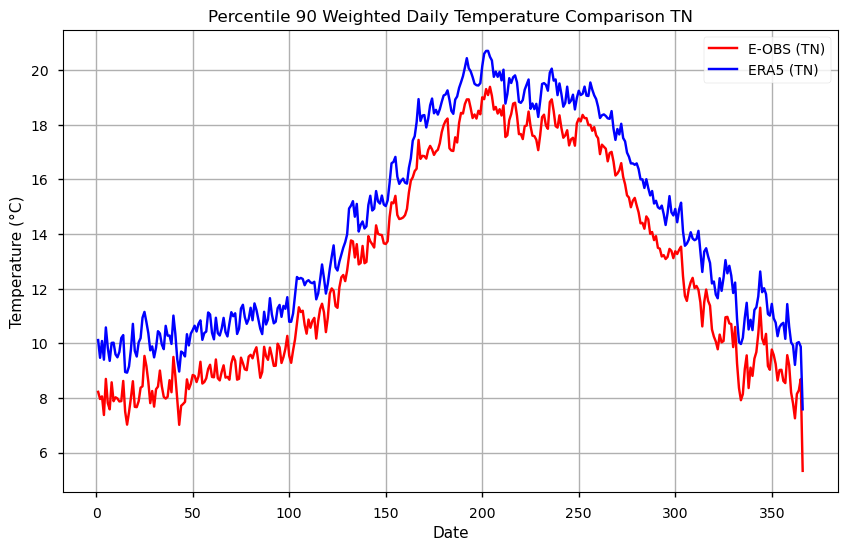

In [126]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.title('Percentile 90 Weighted Daily Temperature Comparison TN')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Plot tg data
plt.plot(p90_tn_ts.dayofyear, p90_tn_ts['TN EOBS'], label='E-OBS (TN)', color='red')
plt.plot(p90_tn_ts.dayofyear, p90_tn_ts['TN ERA5'], label='ERA5 (TN)', color='blue')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [127]:
# Append the first and last 7 days to handle smoothing at the day-of-year extremes
first_days = p90_data_tn.isel(dayofyear=slice(-7, None))
last_days = p90_data_tn.isel(dayofyear=slice(None, 7))

extended_percentile_90_tn = xr.concat([last_days, p90_data_tn, first_days], dim='dayofyear')

# Apply a 15-day moving average
smoothed_percentile_90_tn = extended_percentile_90_tn.rolling(dayofyear=15, center=True).mean()

# Remove the extra days to get back to 366 days
smoothed_percentile_90_tn = smoothed_percentile_90_tn.isel(dayofyear=slice(7, -7))

# Apply weights
p90_data_weighted_tn = smoothed_percentile_90_tn.weighted(weights)

# Calculate the mean over latitude and longitude
p90_tn_ts_smooth = p90_data_weighted_tn.mean(("longitude", "latitude"))


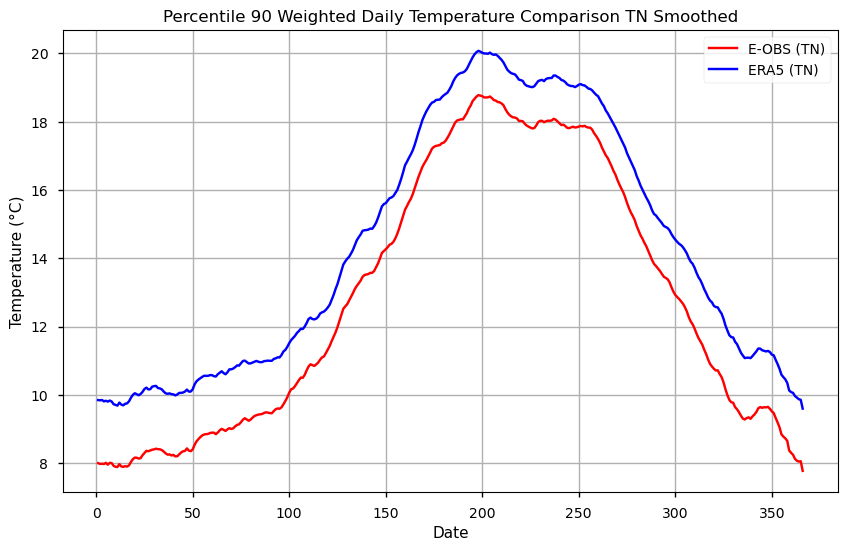

In [128]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.title('Percentile 90 Weighted Daily Temperature Comparison TN Smoothed')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Plot tg data
plt.plot(p90_tn_ts_smooth.dayofyear, p90_tn_ts_smooth['TN EOBS'], label='E-OBS (TN)', color='red')
plt.plot(p90_tn_ts_smooth.dayofyear, p90_tn_ts_smooth['TN ERA5'], label='ERA5 (TN)', color='blue')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### Calculation of Percentil-90 for Maximum Temperaure - TX

A comparison between EOBS and ERA-5 it will be developed

In [129]:
start_date = '1961-01-01'
end_date = '1990-12-31'

# Extract the 'dayofyear' information
merged_tx['dayofyear'] = merged_tx['time.dayofyear']

# Subset the dataset for the specified date range
ref_clim_tx = merged_tx.sel(time=slice(start_date, end_date))

ref_clim_tx = ref_clim_tx.chunk({'time': -1})

ref_clim_tx

<xarray.Dataset>
Dimensions:    (time: 10957, latitude: 21, longitude: 13)
Coordinates:
  * longitude  (longitude) float64 -9.375 -9.125 -8.875 ... -6.875 -6.625 -6.375
  * latitude   (latitude) float64 37.12 37.38 37.62 37.88 ... 41.62 41.88 42.12
  * time       (time) datetime64[ns] 1961-01-01 1961-01-02 ... 1990-12-31
Data variables:
    TX EOBS    (time, latitude, longitude) float32 dask.array<chunksize=(10957, 21, 13), meta=np.ndarray>
    TX ERA5    (time, latitude, longitude) float32 dask.array<chunksize=(10957, 21, 13), meta=np.ndarray>
    dayofyear  (time) int64 dask.array<chunksize=(10957,), meta=np.ndarray>
Attributes:
    E-OBS_version:  25.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Wed Mar 30 09:22:21 2022: ncks --no-abc -d time,0,26297 /...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....

In [130]:
#Find 90th percentile of daily data

p90_data_tx = ref_clim_tx.groupby('dayofyear').quantile(0.9, dim='time')
p90_data_tx

<xarray.Dataset>
Dimensions:    (dayofyear: 366, latitude: 21, longitude: 13)
Coordinates:
  * longitude  (longitude) float64 -9.375 -9.125 -8.875 ... -6.875 -6.625 -6.375
  * latitude   (latitude) float64 37.12 37.38 37.62 37.88 ... 41.62 41.88 42.12
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
    quantile   float64 0.9
Data variables:
    TX EOBS    (dayofyear, latitude, longitude) float64 dask.array<chunksize=(1, 21, 13), meta=np.ndarray>
    TX ERA5    (dayofyear, latitude, longitude) float64 dask.array<chunksize=(1, 21, 13), meta=np.ndarray>

In [131]:
p90_data_weighted_tx = p90_data_tx.weighted(weights)

In [132]:
p90_tx_ts = p90_data_weighted_tx.mean(("longitude", "latitude"))
p90_tx_ts

<xarray.Dataset>
Dimensions:    (dayofyear: 366)
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
    quantile   float64 0.9
Data variables:
    TX EOBS    (dayofyear) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    TX ERA5    (dayofyear) float64 dask.array<chunksize=(1,), meta=np.ndarray>

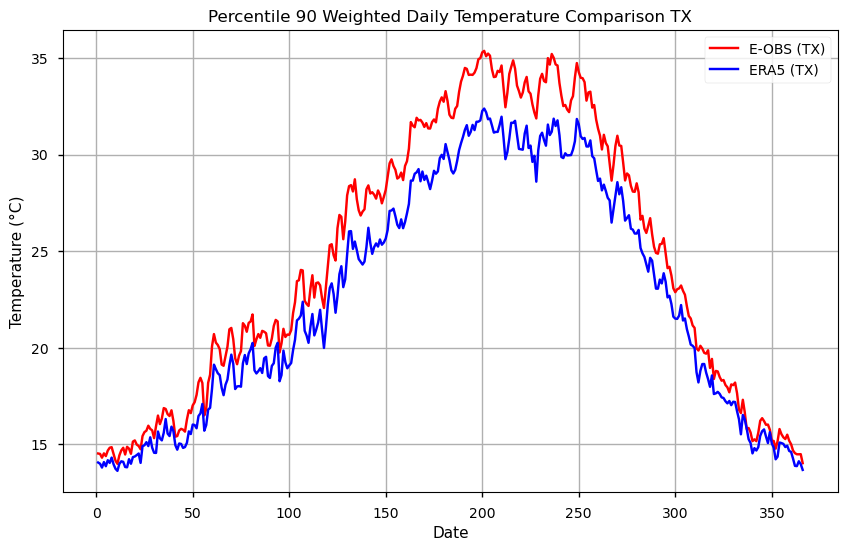

In [133]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.title('Percentile 90 Weighted Daily Temperature Comparison TX')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.plot(p90_tx_ts.dayofyear, p90_tx_ts['TX EOBS'], label='E-OBS (TX)', color='red')
plt.plot(p90_tx_ts.dayofyear, p90_tx_ts['TX ERA5'], label='ERA5 (TX)', color='blue')

plt.legend()

plt.grid(True)
plt.show()


In [134]:
p90_data_weighted_tn = smoothed_percentile_90_tn.weighted(weights)

p90_tn_ts_smooth = p90_data_weighted_tn.mean(("longitude", "latitude"))
p90_tn_ts_smooth

<xarray.Dataset>
Dimensions:    (dayofyear: 366)
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
    quantile   float64 0.9
Data variables:
    TN EOBS    (dayofyear) float64 dask.array<chunksize=(8,), meta=np.ndarray>
    TN ERA5    (dayofyear) float64 dask.array<chunksize=(8,), meta=np.ndarray>

In [135]:
# Append the first and last 7 days to handle smoothing at the day-of-year extremes
first_days = p90_data_tx.isel(dayofyear=slice(-7, None))
last_days = p90_data_tx.isel(dayofyear=slice(None, 7))

extended_percentile_90_tx = xr.concat([last_days, p90_data_tx, first_days], dim='dayofyear')

# Apply a 15-day moving average
smoothed_percentile_90_tx = extended_percentile_90_tx.rolling(dayofyear=15, center=True).mean()

# Remove the extra days to get back to 366 days
smoothed_percentile_90_tx = smoothed_percentile_90_tx.isel(dayofyear=slice(7, -7))

# Apply weights
p90_data_weighted_tx = smoothed_percentile_90_tx.weighted(weights)

# Calculate the mean over latitude and longitude
p90_tx_ts_smooth = p90_data_weighted_tx.mean(("longitude", "latitude"))

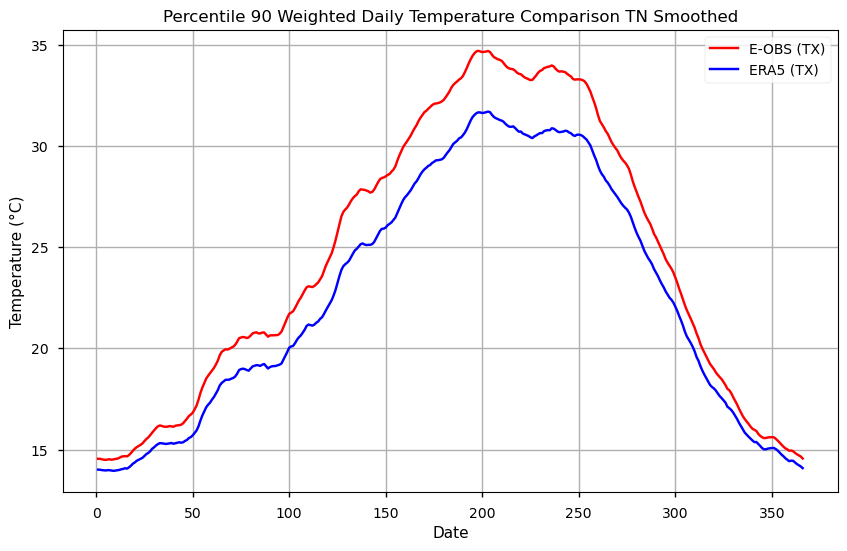

In [136]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.title('Percentile 90 Weighted Daily Temperature Comparison TN Smoothed')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Plot tg data
plt.plot(p90_tx_ts_smooth.dayofyear, p90_tx_ts_smooth['TX EOBS'], label='E-OBS (TX)', color='red')
plt.plot(p90_tx_ts_smooth.dayofyear, p90_tx_ts_smooth['TX ERA5'], label='ERA5 (TX)', color='blue')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

## 4. Trend Analysis Anomalies of Minimum Temperature and Maximum Tempertaure, using Mann-kendal and Thei-Sen Slope estimations

* Mann-Kendall is a non-parametric test used to identify trends in time series data. It assesses whether there is a statistically significant monotonic (i.e., consistently increasing or decreasing) trend in the data over time.
* Sen's Slope estimator is a non-parametric method for estimating the slope of a trend in time series data. It provides a measure of the rate of change over time.


### Calculation of the Anomalies

In [137]:

# Extract the dayofyear from the time dimension in mean_tn
dayofyear = mean_tn['time'].dt.dayofyear

#use these dayofyear values to select the corresponding 90th percentile values from the p90_tn_ts_smooth xarray,
#aligning them with the time dimension of mean_tn.
p90_tn_eobs_expanded = p90_tn_ts_smooth['TN EOBS'].sel(dayofyear=dayofyear)

# Create the anomalies by subtracting the p90 values from the mean_tn values for the EOBS dataset
anomalia_tn_eobs = mean_tn['TN EOBS'] - p90_tn_eobs_expanded

# Create the DataFrame
df_anomalies_tn_eobs = pd.DataFrame({
    'Date': mean_tn['time'].values,
    'daily_weighted': mean_tn['TN EOBS'].values,
    'p90_weighted': p90_tn_eobs_expanded.values,
    'anomalie': anomalia_tn_eobs.values
})

In [138]:
# Replace negative values in the "anomalie" column with NaNs
df_anomalies_tn_eobs['anomalie'] = df_anomalies_tn_eobs['anomalie'].apply(lambda x: np.nan if x < 0 else x)

# Extract the year from the "Date" column
df_anomalies_tn_eobs['Year'] = df_anomalies_tn_eobs['Date'].dt.year

# Group by year to calculate the required statistics
yearly_stats = df_anomalies_tn_eobs.groupby('Year').agg(
    Count_TN_EOBS=('anomalie', 'count'),     # Count the number of non-NaN values in Tn EOBS
    Mean_TN_EOBS=('anomalie', 'mean'),       # Calculate the mean of the non-NaN values in Tn EOBS
    Max_TN_EOBS=('anomalie', 'max')          # Find the maximum of the non-NaN values in Tn EOBS
).reset_index()

# Create the final dataframe with the results in the yearly_stats variable
df_anomalies_tn_eobs_stats = yearly_stats

In [139]:
df_anomalies_tn_eobs_stats

,Year,Count_TN_EOBS,Mean_TN_EOBS,Max_TN_EOBS
0,1950,26,1.113986,3.895862
1,1951,20,0.877313,3.167630
2,1952,40,1.050423,3.569734
3,1953,43,1.137637,3.417066
4,1954,30,0.957634,3.021762
...,...,...,...,...
66,2016,56,1.188822,4.103735
67,2017,66,1.324913,4.322636
68,2018,38,1.174110,3.941674
69,2019,37,1.291727,4.727455


In [140]:
# Function to apply Mann-Kendall and Sen's Slope for a specifi column of a dataframe df
def apply_mk_sen(df, column):
    mk_result = mk.original_test(df[column])
    sen_slope = mk.sens_slope(df[column]).slope
    return mk_result, sen_slope

In [141]:
# Calculate the adjusted intercept - this is for visualization purposes
def calculate_adjusted_intercept(intercept, slope, start_year):
    return intercept - slope * start_year

### Mann-Kendall and Theil-Sen slope definition

In [157]:
def show_mk_sen_results(df, name='TN_EOBS'):
    
    """
    This function applies the function apply_mk_sen to get the Mannkendall and Sen Slope for a 
    given variable (column name) in a dataframe and then we print and plot those results.
    name -> its the variable and the dataset: TN_EOBS, TN_ERA5, TX_EOBS or TX_ERA5
    """
    
    # This variable names are to get 
    count_name = 'Count_' + name
    mean_name = 'Mean_' + name
    max_name = 'Max_' + name

    # Apply the tests for the MannKendall and Sen Slope and get the results
    mk_count, sen_slope_count = apply_mk_sen(df, count_name)
    mk_mean, sen_slope_mean = apply_mk_sen(df, mean_name)
    mk_max, sen_slope_max = apply_mk_sen(df, max_name)

    # Print the results
    print("Mann-Kendall Test for Count:", mk_count)
    print("Sen's Slope for Count:", sen_slope_count)
    print("\nMann-Kendall Test for Mean:", mk_mean)
    print("Sen's Slope for Mean:", sen_slope_mean)
    print("\nMann-Kendall Test for Max:", mk_max)
    print("Sen's Slope for Max:", sen_slope_max)

    # Adjust the intercept for the year range
    start_year = df['Year'].min()
    adjusted_intercept_count = calculate_adjusted_intercept(mk_count.intercept, sen_slope_count, start_year)
    adjusted_intercept_mean = calculate_adjusted_intercept(mk_mean.intercept, sen_slope_mean, start_year)
    adjusted_intercept_max = calculate_adjusted_intercept(mk_max.intercept, sen_slope_max, start_year)

    # Visualize the results
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Plot 'Count' variable
    axs[0].bar(df['Year'], df[count_name], label='Count', color='black')
    axs[0].plot(df['Year'], sen_slope_count * df['Year'] + adjusted_intercept_count, label="Sen's Slope", linestyle='--', color='red')
    axs[0].set_title(f'Count with Mann-Kendall and Sen\'s Slope {count_name}')
    axs[0].set_xlabel('Year')
    axs[0].set_ylabel(f'Count {count_name}')
    axs[0].legend(loc='upper right')
    axs[0].text(0.05, 0.95, f"Slope: {sen_slope_count:.3f} days/year\nP-value: {mk_count.p:.3f}\nTau: {mk_count.Tau:.3f}\nIntercept: {mk_count.intercept:.3f} days",
                transform=axs[0].transAxes, verticalalignment='top', color='red')

    # Plot for 'Mean'
    axs[1].plot(df['Year'], df[mean_name], label='Mean', color='black')
    axs[1].plot(df['Year'], sen_slope_mean * df['Year'] + adjusted_intercept_mean, label="Sen's Slope", linestyle='--', color='red')
    axs[1].set_title(f'Mean with Mann-Kendall and Sen\'s Slope {mean_name}')
    axs[1].set_xlabel('Year')
    axs[1].set_ylabel(f'Mean {mean_name}')
    axs[1].legend(loc='upper right')
    axs[1].text(0.05, 0.95, f"Slope: {sen_slope_mean:.3f} ºC/year\nP-value: {mk_mean.p:.3f}\nTau: {mk_mean.Tau:.3f}\nIntercept: {mk_mean.intercept:.3f} ºC",
                transform=axs[1].transAxes, verticalalignment='top', color='red')

    # Plot for 'Max'
    axs[2].plot(df['Year'], df[max_name], label='Max', color='black')
    axs[2].plot(df['Year'], sen_slope_max * df['Year'] + adjusted_intercept_max, label="Sen's Slope", linestyle='--', color='red')
    axs[2].set_title(f'Max with Mann-Kendall and Sen\'s Slope {max_name}')
    axs[2].set_xlabel('Year')
    axs[2].set_ylabel(f'Max {max_name}')
    axs[2].legend(loc='upper right')
    axs[2].text(0.05, 0.95, f"Slope: {sen_slope_max:.3f} ºC/year\nP-value: {mk_max.p:.3f}\nTau: {mk_max.Tau:.3f}\nIntercept: {mk_max.intercept:.3f} ºC",
                transform=axs[2].transAxes, verticalalignment='top', color='red')

    plt.tight_layout()
    plt.show()


### Trend Analysis Results for TN (E-OBS dataset)

Mann-Kendall Test for Count: Mann_Kendall_Test(trend='increasing', h=True, p=3.106278071651758e-06, z=4.6636644025582, Tau=0.3782696177062374, s=940.0, var_s=40539.333333333336, slope=0.5294117647058824, intercept=21.470588235294116)
Sen's Slope for Count: 0.5294117647058824

Mann-Kendall Test for Mean: Mann_Kendall_Test(trend='increasing', h=True, p=0.007575351547239206, z=2.670432878834079, Tau=0.21690140845070421, s=539.0, var_s=40588.333333333336, slope=0.0036156121991562074, intercept=0.9744159654966549)
Sen's Slope for Mean: 0.0036156121991562074

Mann-Kendall Test for Max: Mann_Kendall_Test(trend='increasing', h=True, p=0.000493116091741852, z=3.4844681801887054, Tau=0.282897384305835, s=703.0, var_s=40588.333333333336, slope=0.015967479466444664, intercept=2.941565023152829)
Sen's Slope for Max: 0.015967479466444664


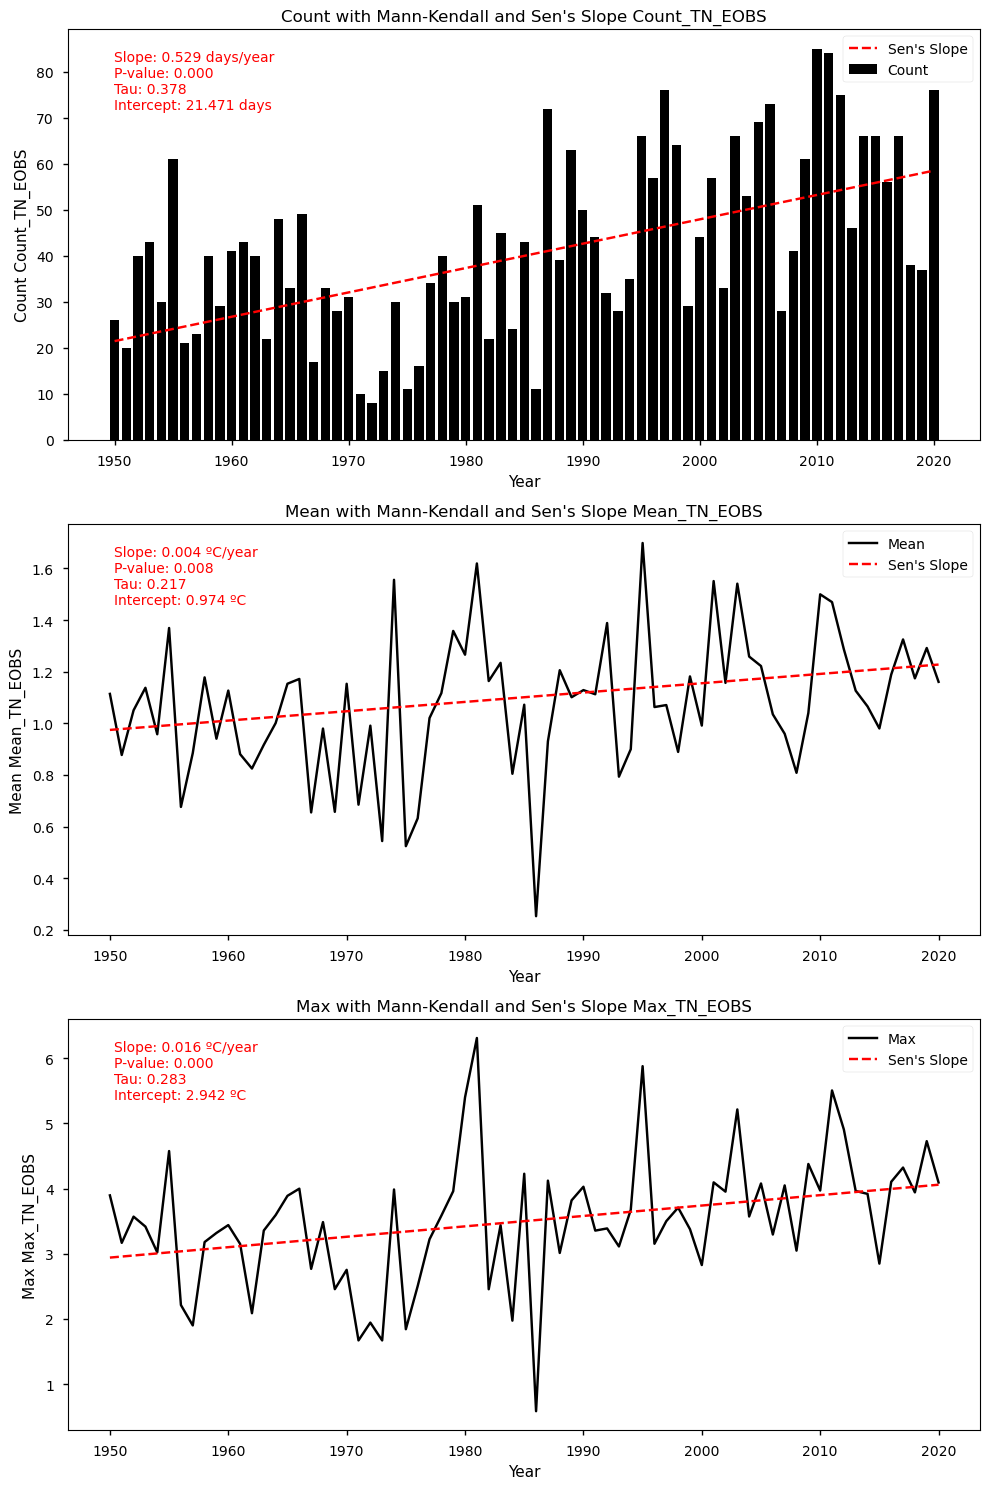

In [158]:
show_mk_sen_results(df=df_anomalies_tn_eobs_stats, name='TN_EOBS')

### Trend Analysis Results for TN (ERA5 dataset)

In [149]:
dayofyear = mean_tn['time'].dt.dayofyear

# Use the dayofyear to select the corresponding p90 values
p90_tn_era5_expanded = p90_tn_ts_smooth['TN ERA5'].sel(dayofyear=dayofyear)

# Create the anomalies by subtracting the p90 values from the mean_tn values
anomalia_tn_era5 = mean_tn['TN ERA5'] - p90_tn_era5_expanded

df_anomalies_tn_era5 = pd.DataFrame({
    'Date': mean_tn['time'].values,
    'daily_weighted': mean_tn['TN ERA5'].values,
    'p90_weighted': p90_tn_era5_expanded.values,
    'anomalie': anomalia_tn_era5.values
})

In [150]:
# Replace negative values in the "anomalie" column with NaNs
df_anomalies_tn_era5['anomalie'] = df_anomalies_tn_era5['anomalie'].apply(lambda x: np.nan if x < 0 else x)

# Extract the year from the "Date" column
df_anomalies_tn_era5['Year'] = df_anomalies_tn_era5['Date'].dt.year

# Group by year to calculate the required statistics
yearly_stats = df_anomalies_tn_era5.groupby('Year').agg(
    Count_TN_ERA5=('anomalie', 'count'),
    Mean_TN_ERA5=('anomalie', 'mean'),
    Max_TN_ERA5=('anomalie', 'max')
).reset_index()

# Create the final dataframe with the results in the yearly_stats variable
df_anomalies_tn_era5_stats = yearly_stats

Mann-Kendall Test for Count: Mann_Kendall_Test(trend='increasing', h=True, p=1.134347171749539e-07, z=5.3037708087559965, Tau=0.4301810865191147, s=1069.0, var_s=40548.333333333336, slope=0.5769230769230769, intercept=18.80769230769231)
Sen's Slope for Count: 0.5769230769230769

Mann-Kendall Test for Mean: Mann_Kendall_Test(trend='increasing', h=True, p=0.0027172873786209806, z=2.9980324513304533, Tau=0.24346076458752516, s=605.0, var_s=40588.333333333336, slope=0.003782038581785288, intercept=0.8650997385476302)
Sen's Slope for Mean: 0.003782038581785288

Mann-Kendall Test for Max: Mann_Kendall_Test(trend='increasing', h=True, p=9.178531977305227e-05, z=3.9113403504112534, Tau=0.3175050301810865, s=789.0, var_s=40588.333333333336, slope=0.01917997616127038, intercept=2.4838630542239666)
Sen's Slope for Max: 0.01917997616127038


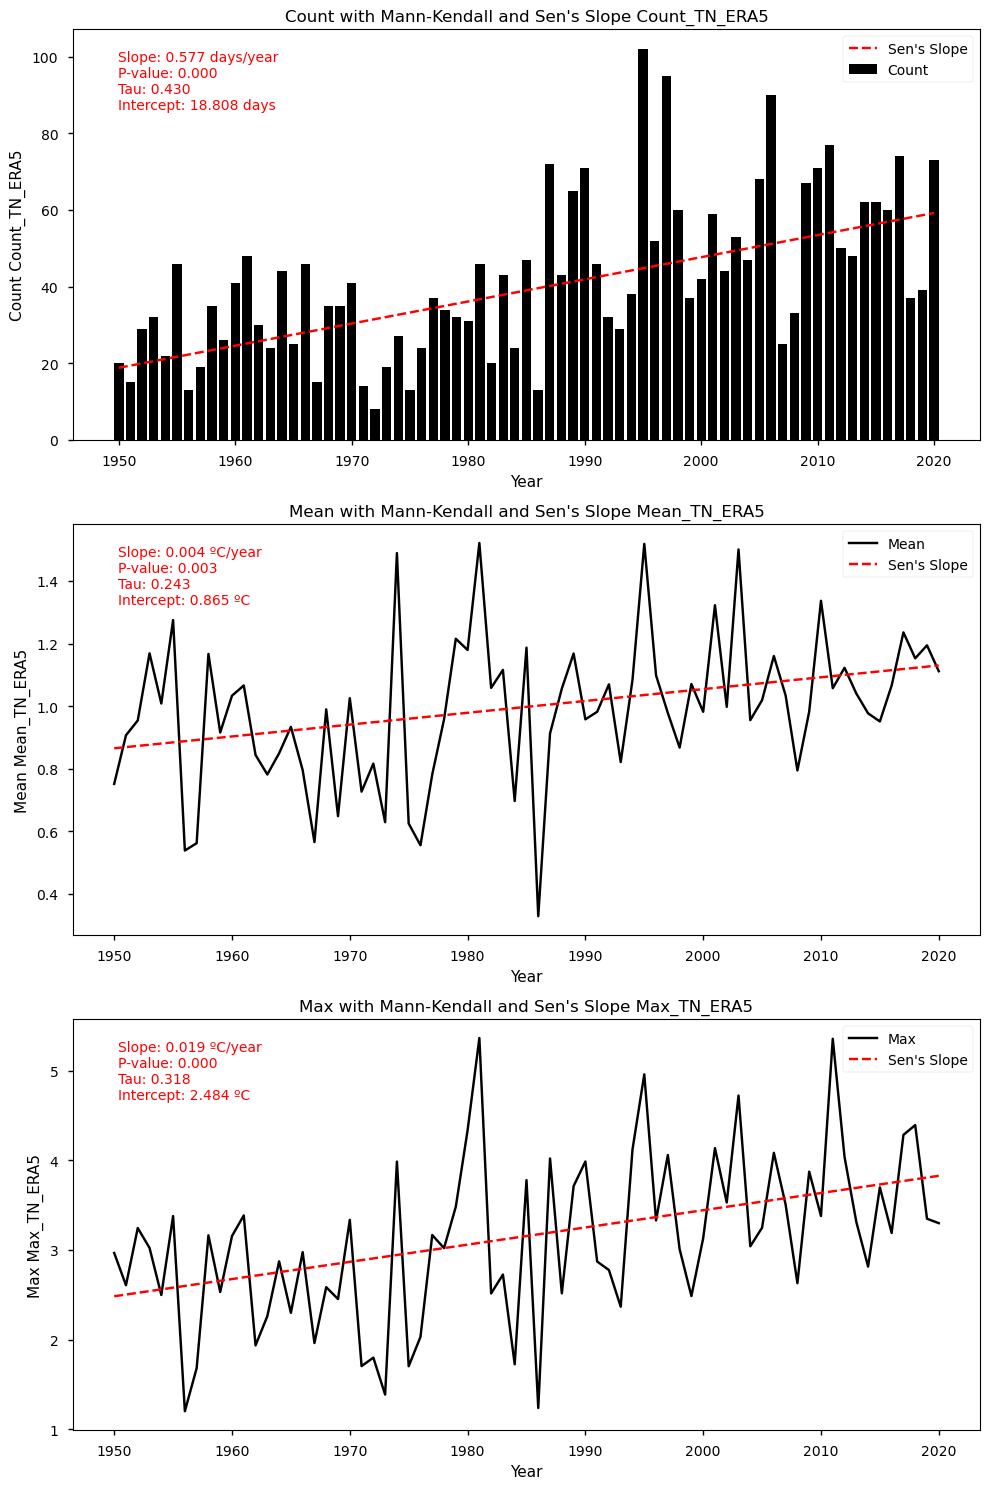

In [159]:
show_mk_sen_results(df=df_anomalies_tn_era5_stats, name='TN_ERA5')

### Trend Analysis Results for TX (EOBS dataset)

In [152]:
dayofyear = mean_tx['time'].dt.dayofyear

# Use the dayofyear to select the corresponding p90 values
p90_tx_eobs_expanded = p90_tx_ts_smooth['TX EOBS'].sel(dayofyear=dayofyear)

# Create the anomalies by subtracting the p90 values from the mean_tx values
anomalia_tx_eobs = mean_tx['TX EOBS'] - p90_tx_eobs_expanded

df_anomalies_tx_eobs = pd.DataFrame({
    'Date': mean_tx['time'].values,
    'daily_weighted': mean_tx['TX EOBS'].values,
    'p90_weighted': p90_tx_eobs_expanded.values,
    'anomalie': anomalia_tx_eobs.values
})

In [153]:
# Replace negative values in the "anomalie" column with NaNs
df_anomalies_tx_eobs['anomalie'] = df_anomalies_tx_eobs['anomalie'].apply(lambda x: np.nan if x < 0 else x)

# Extract the year from the "Date" column
df_anomalies_tx_eobs['Year'] = df_anomalies_tx_eobs['Date'].dt.year

# Group by year to calculate the required statistics
yearly_stats = df_anomalies_tx_eobs.groupby('Year').agg(
    Count_TX_EOBS=('anomalie', 'count'),
    Mean_TX_EOBS=('anomalie', 'mean'),
    Max_TX_EOBS=('anomalie', 'max')
).reset_index()

# Create the final dataframe with the results in the yearly_stats variable
df_anomalies_tx_eobs_stats = yearly_stats

Mann-Kendall Test for Count: Mann_Kendall_Test(trend='increasing', h=True, p=6.382294692741652e-11, z=6.534498609889288, Tau=0.5299798792756539, s=1317.0, var_s=40559.0, slope=0.8775510204081632, intercept=10.285714285714288)
Sen's Slope for Count: 0.8775510204081632

Mann-Kendall Test for Mean: Mann_Kendall_Test(trend='increasing', h=True, p=6.275057414573126e-06, z=4.516903196540914, Tau=0.3665995975855131, s=911.0, var_s=40588.333333333336, slope=0.009694822041919748, intercept=1.0837389050306954)
Sen's Slope for Mean: 0.009694822041919748

Mann-Kendall Test for Max: Mann_Kendall_Test(trend='increasing', h=True, p=6.890321764485563e-06, z=4.4970486769956795, Tau=0.36498993963782694, s=907.0, var_s=40588.333333333336, slope=0.04135438773385811, intercept=3.039740597038093)
Sen's Slope for Max: 0.04135438773385811


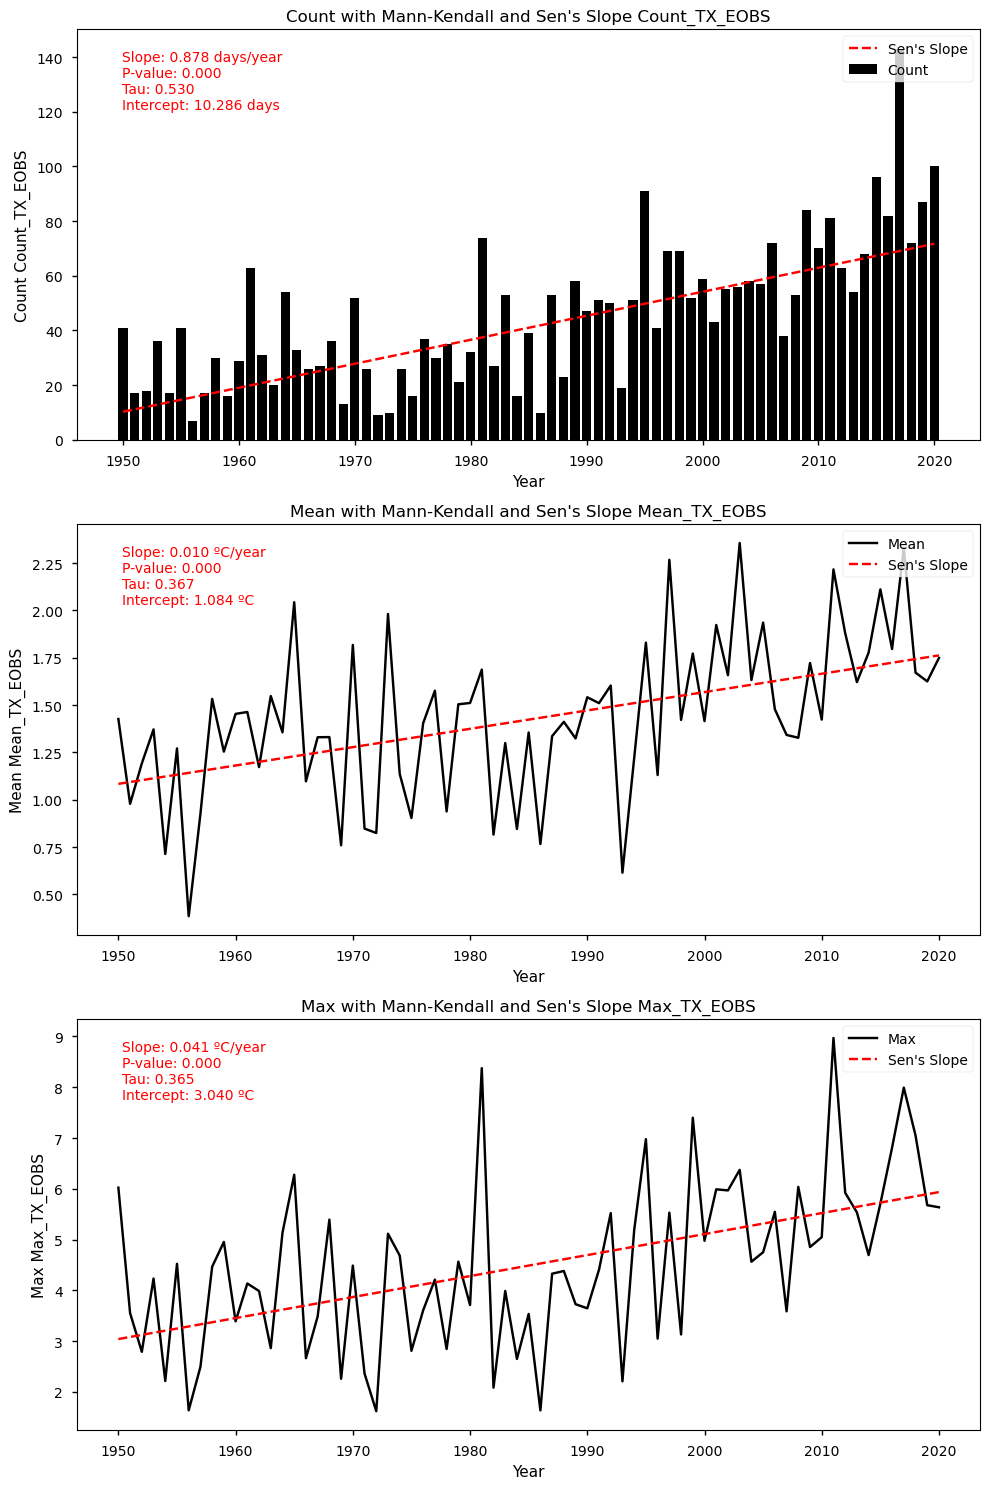

In [160]:
show_mk_sen_results(df=df_anomalies_tx_eobs_stats, name='TX_EOBS')

### Trend Analysis Results for TX (ERA5 dataset)

In [161]:
dayofyear = mean_tx['time'].dt.dayofyear

# Use the dayofyear to select the corresponding p90 values
p90_tx_era5_expanded = p90_tx_ts_smooth['TX ERA5'].sel(dayofyear=dayofyear)

# Create the anomalies by subtracting the p90 values from the mean_tx values
anomalia_tx_era5 = mean_tx['TX ERA5'] - p90_tx_era5_expanded

df_anomalies_tx_era5 = pd.DataFrame({
    'Date': mean_tx['time'].values,
    'daily_weighted': mean_tx['TX ERA5'].values,
    'p90_weighted': p90_tx_era5_expanded.values,
    'anomalie': anomalia_tx_era5.values
})

In [162]:
# Replace negative values in the "anomalie" column with NaNs
df_anomalies_tx_era5['anomalie'] = df_anomalies_tx_era5['anomalie'].apply(lambda x: np.nan if x < 0 else x)

# Extract the year from the "Date" column
df_anomalies_tx_era5['Year'] = df_anomalies_tx_era5['Date'].dt.year

# Group by year to calculate the required statistics
yearly_stats = df_anomalies_tx_era5.groupby('Year').agg(
    Count_TX_ERA5=('anomalie', 'count'),
    Mean_TX_ERA5=('anomalie', 'mean'),
    Max_TX_ERA5=('anomalie', 'max')
).reset_index()

# Create the final dataframe with the results in the yearly_stats variable
df_anomalies_tx_era5_stats = yearly_stats

Mann-Kendall Test for Count: Mann_Kendall_Test(trend='increasing', h=True, p=1.2695111628602262e-10, z=6.430779657809717, Tau=0.5215291750503018, s=1296.0, var_s=40552.0, slope=0.8163265306122449, intercept=23.428571428571427)
Sen's Slope for Count: 0.8163265306122449

Mann-Kendall Test for Mean: Mann_Kendall_Test(trend='increasing', h=True, p=0.00017507690203300008, z=3.752504194049375, Tau=0.30462776659959756, s=757.0, var_s=40588.333333333336, slope=0.007169090916251732, intercept=1.1114792025820004)
Sen's Slope for Mean: 0.007169090916251732

Mann-Kendall Test for Max: Mann_Kendall_Test(trend='increasing', h=True, p=6.275057414573126e-06, z=4.516903196540914, Tau=0.3665995975855131, s=911.0, var_s=40588.333333333336, slope=0.03379334706263215, intercept=2.932632732252907)
Sen's Slope for Max: 0.03379334706263215


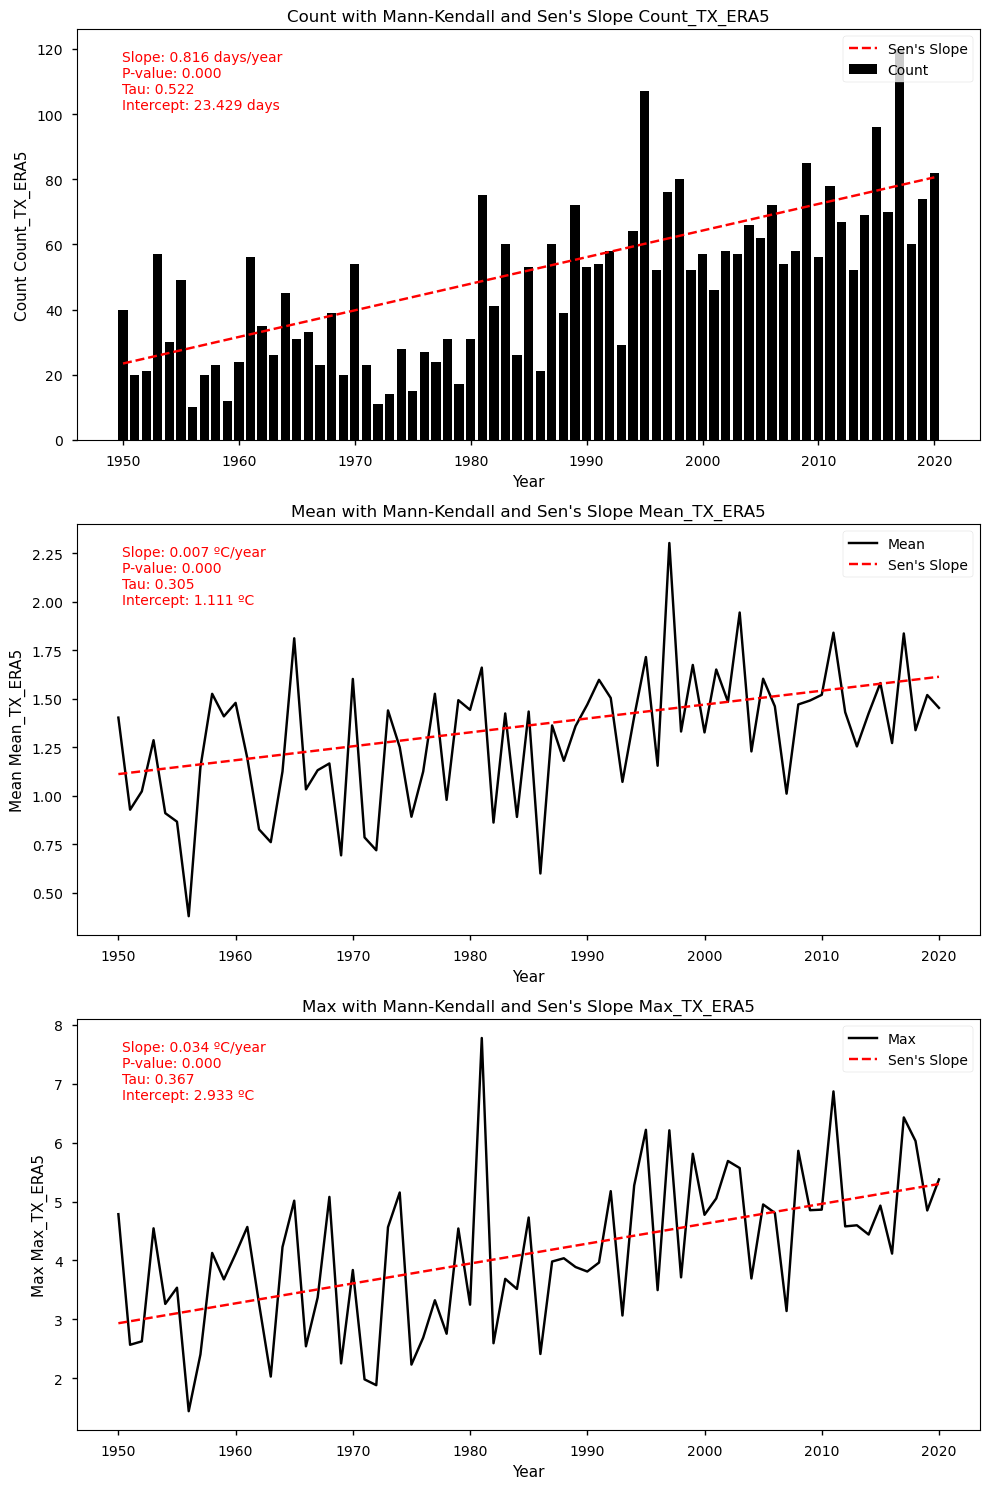

In [163]:
show_mk_sen_results(df=df_anomalies_tx_era5_stats, name='TX_ERA5')

## 5. Main takeaways

- The study analyzed annual minimum and maximum temperatures over the Iberian Peninsula using E-OBS and ERA5 datasets for specified time periods.

- The year of 1956 exhibited the most extreme minimum temperatures. ERA5 data showed similar trends to E-OBS but generally overestimated these temperatures. Accordingly to *Bell et al.(2021)* , the discrepancies observed in minimum temperature estimates between ERA5 and E-OBS can be attributed to differences in gridding methods and station coverage, highlighting the importance of ensemble-based uncertainty estimation. 

- The year 2017 exhibited the most extreme maximum temperatures. In this case, ERA5 data again showed similar trends to E-OBS, but E-OBS tended to overestimate the temperatures. Consistent with the findings in *Bell et al., (2021)*, the overestimation of maximum temperatures by E-OBS compared to ERA5 may result from the spatial variation influenced by station density and gridding method discrepancies.

- E-OBS appears to be more sensitive to higher temperatures, showing higher maximum values, while ERA5 is more responsive to lower temperatures. However, it's notable that ERA5 underestimates extreme cold days and heat days compared to E-OBS. This statement was also provided by *Cornes et al. (2018)*, which observed that underestimating true uncertainty in data-sparse regions in E-OBS might contribute to the overestimation of temperatures noted in the main takeaways.

- Both datasets indicate a small, positive, and increasing trend in the mean anomalies for both minimum (TN) and maximum (TX) temperatures, with similar values observed between the two datasets.

- When comparing the 90th percentile of weighted daily minimum temperatures, ERA5 tends to show higher values than E-OBS in both smoothed and non-smoothed data. For maximum temperatures, E-OBS tends to show higher values than ERA5 in both smoothed and non-smoothed data.


## 6. References

1. World Meteorological Organization (WMO) Guidelines on the Calculation of Climate Normals: https://library.wmo.int/index.php?lvl=notice_display&id=20130

2. E-OBS daily gridded observations for Europe from 1950 to present: Product user guide: https://confluence.ecmwf.int/display/CKB/E-OBS+daily+gridded+observations+for+Europe+from+1950+to+present%3A+Product+user+guide

3. Research paper describing the E-OBS ensemble version: Cornes, R., G. van der Schrier, E.J.M. van den Besselaar, and P.D. Jones. 2018: An Ensemble Version of the E-OBS Temperature and Precipitation Datasets, J. Geophys. Res. (Atmospheres), 123. doi:10.1029/2017JD028200

4. Research paper comparig E-OBS and ERA5 results and analysis:
    - Bell, Bill, Hans Hersbach, Adrian Simmons, Paul Berrisford, Per Dahlgren, András Horányi, Joaquín Muñoz-Sabater, et al. 2021. “The ERA5 Global Reanalysis: Preliminary Extension to 1950.” Quarterly Journal of the Royal Meteorological Society 147 (741): 4186–4227. https://doi.org/10.1002/QJ.4174.
    - Cornes, Richard C., Gerard van der Schrier, Else J.M. van den Besselaar, and Philip D. Jones. 2018. “An Ensemble Version of the E-OBS Temperature and Precipitation Data Sets.” Journal of Geophysical Research: Atmospheres 123 (17): 9391–9409. https://doi.org/10.1029/2017JD028200.
